In [69]:
from utils.neural_network import Neuron, Layer, MLP
from utils.graph_builder import draw_dot
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# instantiate an MLP and an input layer
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.38675191728260044)

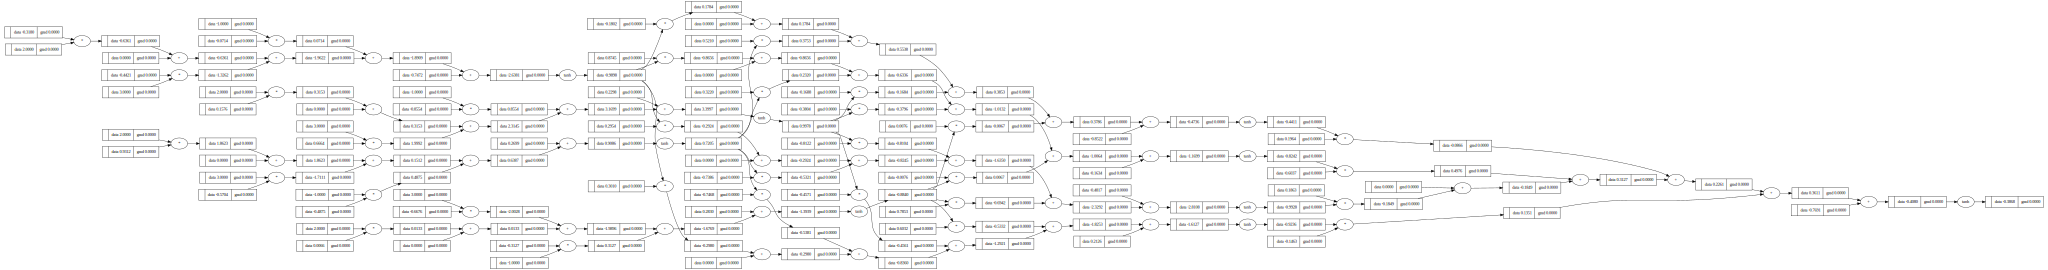

In [39]:
# draw the computational graph of the MLP
draw_dot(n(x))

In [40]:
# input data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

# desired targets
ys = [1.0, -1.0, -1.0, 1.0]  

In [57]:
# run a forward pass
ypred = [n(x) for x in xs]
 
# calculate the loss function
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=2.8560682614553214)

In [58]:
#backward pass (calculate the gradients through backpropagation)
for p in n.parameters():
     p.grad = 0.0 # we need to flush the gradients before, we do not want to add up to them
loss.backward()

In [59]:
#update the weights through gradient descent 
for p in n.parameters():
    p.data += -0.01 * p.grad #can adjust the learning rate

In [60]:
# spits out the predictions of the MLP
ypred

[Value(data=0.07769799407264094),
 Value(data=-0.3651849305322136),
 Value(data=-0.1978568311025787),
 Value(data=0.020712792136288596)]

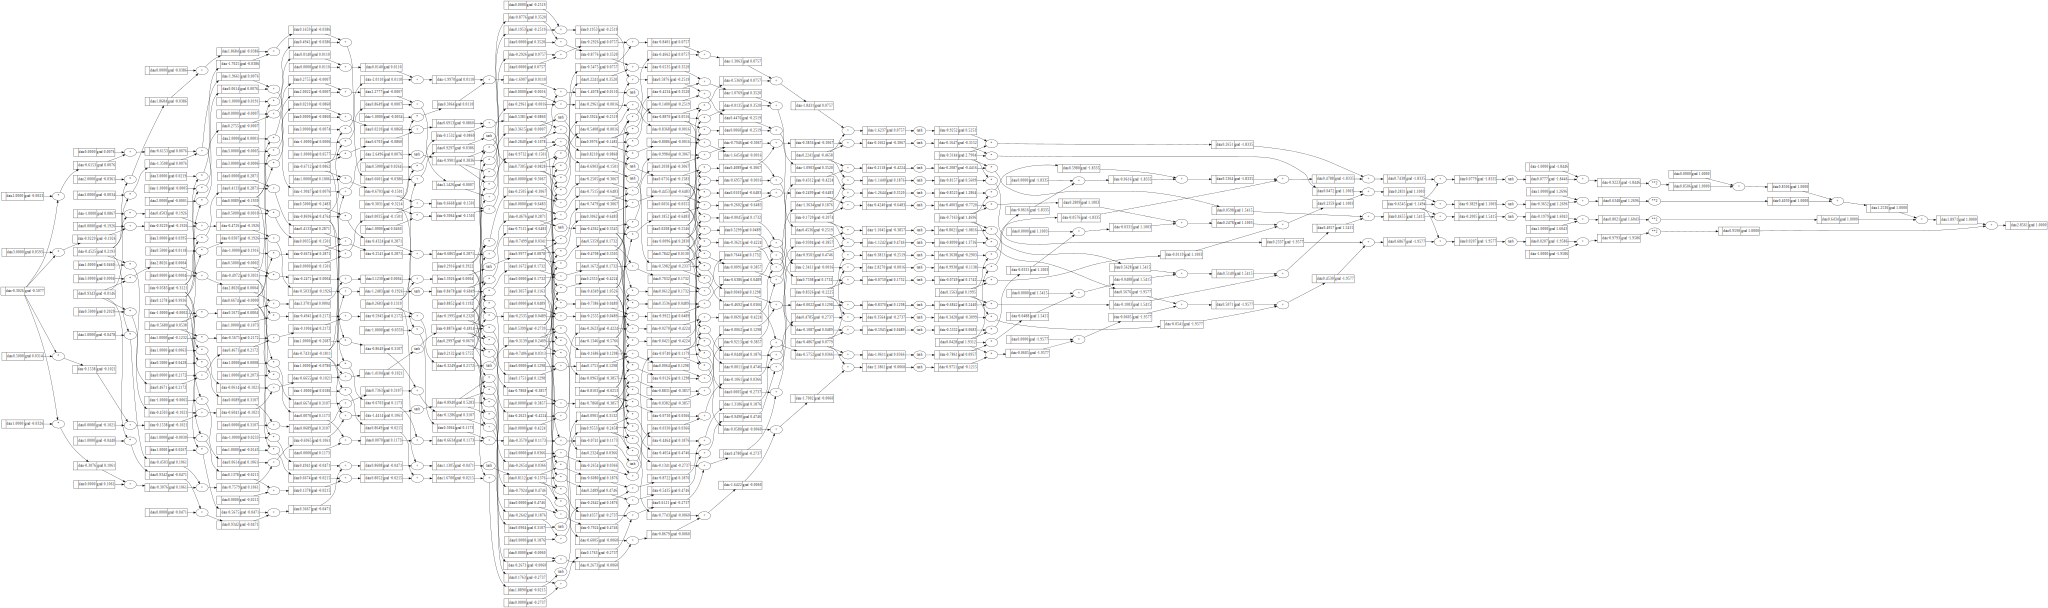

In [61]:
# draw the computational graph of the MLP wrapped into the loss function
draw_dot(loss)

In [62]:
n.parameters()

[Value(data=-0.3025575700324796),
 Value(data=-0.45247460126253514),
 Value(data=-0.058282047861871134),
 Value(data=-0.7431207236198774),
 Value(data=0.9343364771587801),
 Value(data=-0.5680226175344941),
 Value(data=-0.49717009930572675),
 Value(data=0.2683155062207158),
 Value(data=0.12783622677630468),
 Value(data=0.6674017653837184),
 Value(data=-0.8696212055926875),
 Value(data=0.2131703913043075),
 Value(data=0.00893310966302426),
 Value(data=-0.6712083486167895),
 Value(data=-0.30314994064176704),
 Value(data=0.2839588544787342),
 Value(data=0.2997133434061866),
 Value(data=-0.7406125737722377),
 Value(data=-0.8102964804717827),
 Value(data=0.7841731139345938),
 Value(data=-0.4866641606595182),
 Value(data=0.8852273202637556),
 Value(data=0.3056933389180791),
 Value(data=-0.4349447407591971),
 Value(data=0.020751351521458107),
 Value(data=-0.17201171270150534),
 Value(data=-0.19954599554996474),
 Value(data=0.5398951281257355),
 Value(data=-0.1345954240629106),
 Value(data=-0.0

now implement a loop which is better

In [88]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.8790353533204125)

In [89]:
# input data
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

# desired targets
ys = [1.0, -1.0, -1.0, 1.0]  

In [90]:
# train the network
losses = []
steps = 30

for k in range(steps): #training for just 20 steps

    #forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    #backward pass (calculate the gradients)
    for p in n.parameters():
        p.grad = 0.0 # remember we need to flush the gradients before, we do not want to add up to them
    loss.backward()

    #update the weights
    for p in n.parameters():
        p.data += -0.01 * p.grad #can adjust the learning rate and see what happens

    losses.append(loss.data)
    print(k, loss.data)

0 6.99517983987825
1 6.858120871093858
2 6.687659441227389
3 6.473801750960586
4 6.204745053332453
5 5.869347964022501
6 5.464273954945736
7 5.00787382789304
8 4.553610452413753
9 4.1769739897331295
10 3.924124465815556
11 3.7806512839220083
12 3.70268998311116
13 3.654834485493847
14 3.6180358130580883
15 3.5836707850134695
16 3.5480143578303447
17 3.5093675854836714
18 3.4668165212640334
19 3.4197382042790974
20 3.3676174733054567
21 3.309989766824381
22 3.2464354802548283
23 3.1765951020745655
24 3.100189570059361
25 3.0170339045527856
26 2.9270318193101432
27 2.830138969923609
28 2.7262857305448724
29 2.6152587855213274


In [92]:
ypred

[Value(data=0.12641152297876124),
 Value(data=-0.29490930156909945),
 Value(data=-0.02832513629637615),
 Value(data=0.3590655068029117)]

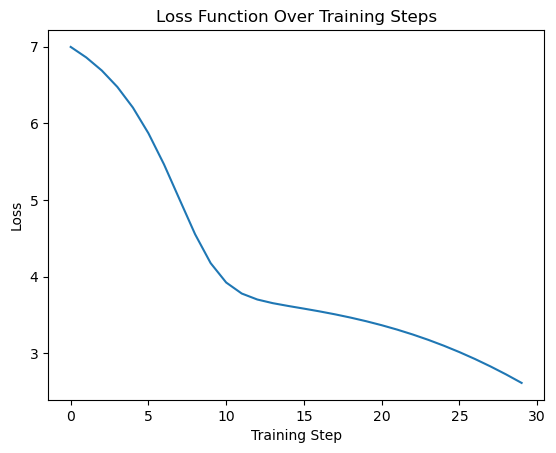

In [91]:
# Plot the loss values
plt.plot(range(steps), losses)
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Loss Function Over Training Steps')
plt.show()